# Saturdays.AI Guadalajara 4a Ed.
### Clustering with K-means

#### Luis Román

### Septiembre de 2022

### Mall Customer Segmentation Data
![imagen.png](https://images.unsplash.com/photo-1567966703322-8aa782585b34?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1170&q=80)


Créditos: Alexander Kovacs

Datos: https://www.kaggle.com/code/kushal1996/customer-segmentation-k-means-analysis/data

In [1]:
# Manipulación de datos
import pandas as pd
# Graficación
import matplotlib.pyplot as plt
import seaborn as sns
# Aprendizaje no supervisado
from sklearn.cluster import KMeans

# Configuración de los gráficos
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)



In [2]:
# Inicialización del dataframe
df = pd.read_csv("../data/mall-customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
# Estructura de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
# Verificación de nulos
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
# Selección de características a partir del dataset
X = df.loc[:, ["Annual Income (k$)", "Spending Score (1-100)"]]

In [6]:
X.head(10)

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
5,17,76
6,18,6
7,18,94
8,19,3
9,19,72


### Selección aleatoria de clústers

In [7]:
# Aproximación aleatoria de clusters
kmeans = KMeans(n_clusters=8)
X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")
X.head()

,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,1
1,15,81,2
2,16,6,1
3,16,77,2
4,17,40,1


In [9]:
# Obtención de los centroides
centroids = kmeans.cluster_centers_
print(centroids)

[[ 63.95238095  46.21428571]
 [ 25.14285714  19.52380952]
 [ 25.0952381   80.04761905]
 [108.18181818  82.72727273]
 [ 47.44444444  51.24444444]
 [ 80.18181818  12.68181818]
 [ 78.03571429  81.89285714]
 [109.7         22.        ]]


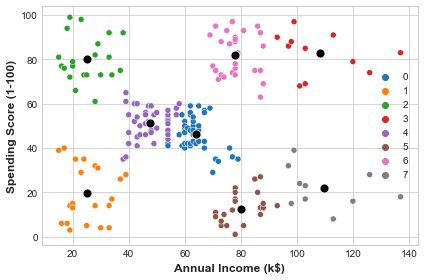

In [10]:
# Graficación de los clústers
ax = sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", hue="Cluster", data=X)
sns.scatterplot(x=centroids[:,0], y=centroids[:,1], s=80, color='black', ax=ax)
plt.tight_layout()
plt.show()

### Conocimiento de la cantidad óptima de clústers (Elbow Method)

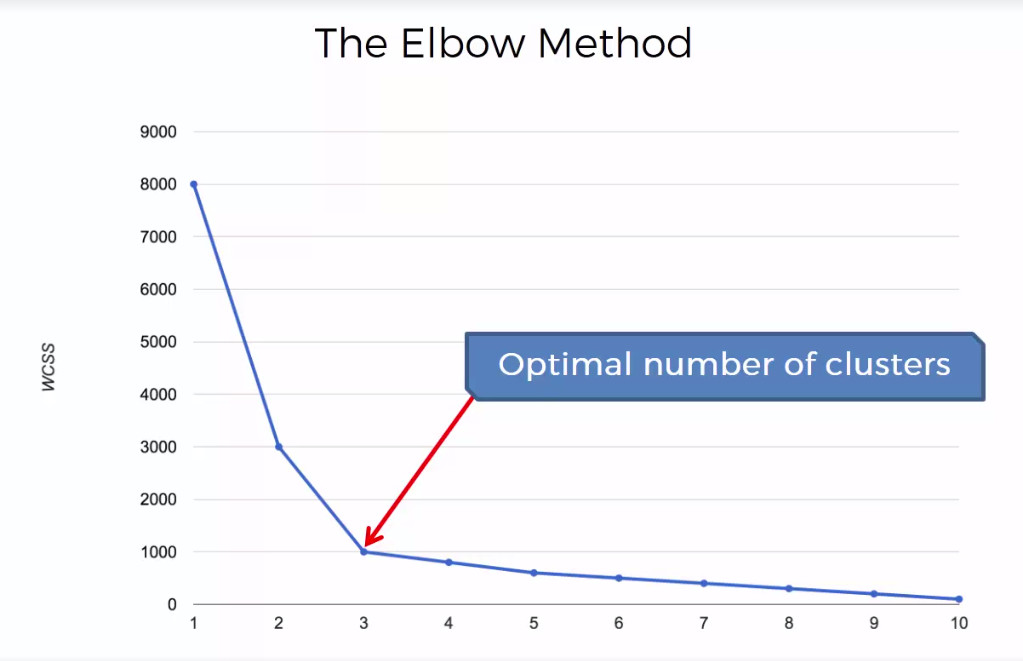

Credits: https://www.linkedin.com/pulse/finding-optimal-number-clusters-k-means-through-elbow-asanka-perera/

Dicho Método utiliza los valores de la inercia obtenidos tras aplicar el K-means al número escogido de clústers.
Como resultado de la suma de las distancias al cuadrado de cada objeto del Clúster a su centroide, obtendremos la inercia.

Puntualmente la distancia entre los puntos en un clúster o por sus siglas en inglés "within cluster sum of squares(wcss)", será contrastada con el número de clústers (10 por estándar), para saber el número óptimo de clústers para ajustar desde un inicio.


In [10]:
# Lista para cuardar los valores de innercia entre cada cluster
wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


D:\Softs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


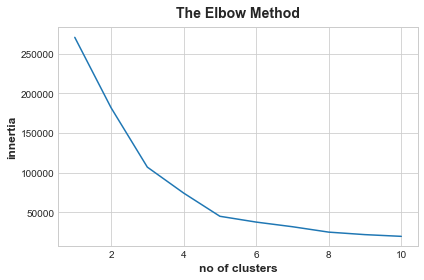

In [11]:
# Verificación del método del codo
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('innertia')
plt.show()

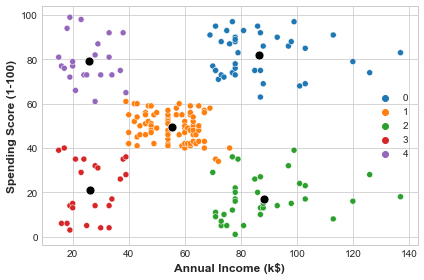

In [13]:
# Verificar los nuevos clústers basados en el valor recomendado por el método del codo
X_new = df.loc[:, ["Annual Income (k$)", "Spending Score (1-100)"]]
kmeans = KMeans(n_clusters=5)
X_new["Cluster"] = kmeans.fit_predict(X)
X_new["Cluster"] = X_new["Cluster"].astype("category")
X_new.head()
centroids = kmeans.cluster_centers_
c_kmeans = sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", hue="Cluster", data=X_new)
sns.scatterplot(x=centroids[:,0], y=centroids[:,1], s=80, color='black', ax=c_kmeans)
plt.tight_layout()
plt.show()

## Créditos y  Referencias

Kushal Mahindrakar  https://www.kaggle.com/code/kushal1996/customer-segmentation-k-means-analysis/notebook
Ryan Holbrook  https://www.kaggle.com/code/ryanholbrook/clustering-with-k-means
Basil Saji https://www.analyticsvidhya.com/blog/2021/01/in-depth-intuition-of-k-means-clustering-algorithm-in-machine-learning/

## Saber más
https://towardsdatascience.com/clustering-how-to-find-hyperparameters-using-inertia-b0343c6fe819
https://upcommons.upc.edu/bitstream/handle/2117/129564/10808-43941-1-PB.pdf;jsessionid=CB9A3DAA6ED5D68EC22B3F5946A63EB3?sequence=1
